<a href="https://colab.research.google.com/github/rajsecrets/Generate-Text-to-Image-Segmind-SSD-1B/blob/main/SSD_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers accelerate safetensors

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-bdbww356
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-bdbww356
  Resolved https://github.com/huggingface/diffusers to commit f912f39b50f87e50a9d99346f5c1b6e644653262
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.7 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1602258 sha256=0539c383a97187177ff2a1b4bba6c2592c445814bd02209b3528f14bdc18b636
  Stored in directory: /tmp/pip-ephem-wheel-cache-279h_lko/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.9 MB/s eta 0:00:

In [2]:
from diffusers import StableDiffusionXLPipeline
import torch
from transformers.pipelines.image_to_text import Image
from IPython.display import display

In [3]:
from diffusers.utils.import_utils import USE_SAFETENSORS
pipe = StableDiffusionXLPipeline.from_pretrained(
    "segmind/SSD-1B",
    tensor_dtype = torch.float16,
    USE_SAFETENSORS = True,
    variant = 'fp16'
)

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Keyword arguments {'tensor_dtype': torch.float16, 'USE_SAFETENSORS': True} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

loading file vocab.json
loading file merges.txt
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading file tokenizer.json
ftfy or spacy is not installed using custom BasicTokenizer instead of ftfy.
loading configuration file /root/.cache/huggingface/hub/models--segmind--SSD-1B/snapshots/cb41151eacb3ac20c6149e27458cf6291eb2df30/text_encoder/config.json
Model config CLIPTextConfig {
  "architectures": [
    "CLIPTextModel"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "dropout": 0.0,
  "eos_token_id": 2,
  "hidden_act": "quick_gelu",
  "hidden_size": 768,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 77,
  "model_type": "clip_text_model",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "projection_dim": 768,
  "torch_dtype": "float32",
  "transformers_version": "4.34.1",
  "vocab_size": 49408
}



In [4]:
pipe.to('cuda')

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [23]:
prompt = 'most HANDSOME MEN adult realistic high quality  '
neg_prompt = 'ugly, blurry, poor quality'

In [24]:
image = pipe(prompt = prompt , negative_prompt = neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

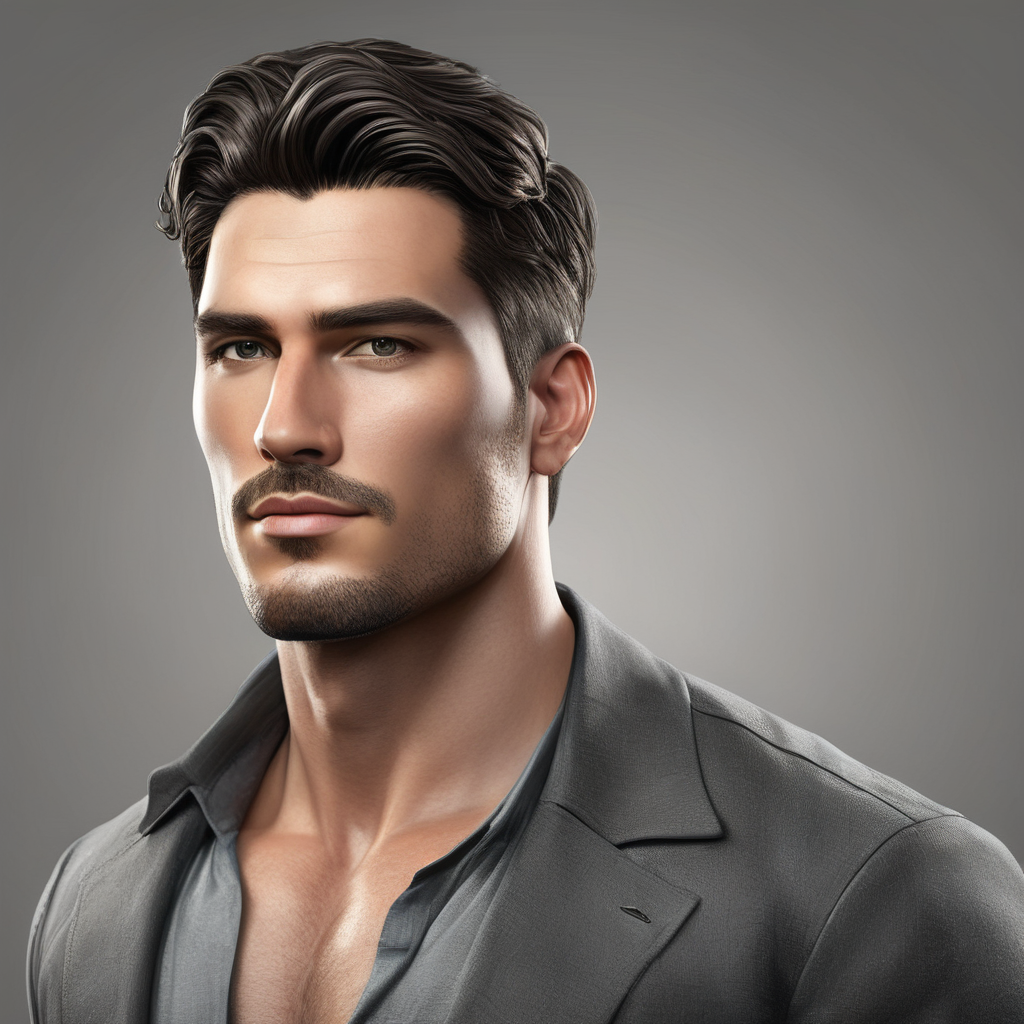

In [25]:
display(image)